## Feature Engineering

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from ift6758.features.feature_engineering1 import SeasonDataSet
import numpy as np
import os
import random



In [2]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [3]:
train_years = [2015,2016,2017,2018]
test_years=[2019]


In [4]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [10]:
train_df[train_df['distanceNet']>150] 

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
19,Goal,2015020001,Toronto Maple Leafs,2,00:19,REGULAR,19:41,-73.0,-1.0,Deflected,False,Power Play,James van Riemsdyk,Carey Price,"(89, 0)",1,162.003086,0.353673
30,Shot,2015020001,Montréal Canadiens,2,08:42,REGULAR,11:18,75.0,0.0,Snap Shot,0,NaN,Alexei Emelin,Jonathan Bernier,"(-89, 0)",0,164.000000,0.000000
694,Shot,2015020013,Columbus Blue Jackets,1,00:59,REGULAR,19:01,-87.0,7.0,Wrist Shot,0,NaN,Brandon Dubinsky,Henrik Lundqvist,"(89, 0)",0,176.139150,-2.277609
696,Shot,2015020013,New York Rangers,1,02:17,REGULAR,17:43,63.0,13.0,Wrist Shot,0,NaN,Chris Kreider,Sergei Bobrovsky,"(-89, 0)",0,152.554908,4.888401
697,Shot,2015020013,Columbus Blue Jackets,1,02:53,REGULAR,17:07,-61.0,-15.0,Snap Shot,0,NaN,Rene Bourque,Henrik Lundqvist,"(89, 0)",0,150.748134,5.710593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332288,Shot,2018030325,St. Louis Blues,3,16:26,REGULAR,03:34,96.0,5.0,Wrist Shot,0,NaN,Alex Pietrangelo,Martin Jones,"(-89, 0)",0,185.067555,1.548158
332298,Shot,2018030326,San Jose Sharks,1,07:42,REGULAR,12:18,78.0,-3.0,Wrist Shot,0,NaN,Tim Heed,Jordan Binnington,"(-89, 0)",0,167.026944,-1.029155
332348,Shot,2018030411,Boston Bruins,1,13:41,REGULAR,06:19,-60.0,25.0,Snap Shot,0,NaN,Torey Krug,Jordan Binnington,"(89, 0)",0,151.082759,-9.524668
332688,Shot,2018030416,St. Louis Blues,3,19:48,REGULAR,00:12,-74.0,15.0,Wrist Shot,0,NaN,Carl Gunnarsson,Tuukka Rask,"(89, 0)",0,163.688729,-5.257809


In [5]:
df_features_y = train_df[["distanceNet","angleNet","isGoal"]]


In [6]:
df_features_y

,distanceNet,angleNet,isGoal
0,34.525353,10.007980,0
1,10.000000,0.000000,0
2,14.035669,-4.085617,0
3,49.517674,-46.636577,0
4,28.017851,-2.045408,0
...,...,...,...
332737,13.892444,30.256437,1
332738,21.189620,19.290046,0
332739,24.331050,-9.462322,0
332740,47.095647,-3.652223,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

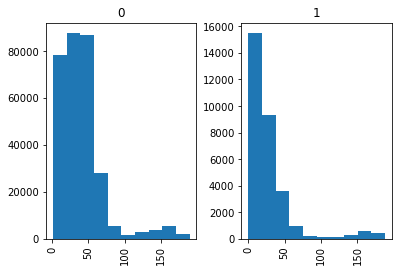

In [7]:
df_features_y.hist(column='distanceNet', by='isGoal')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

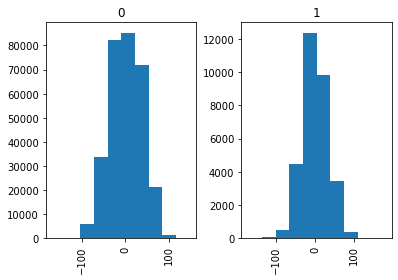

In [8]:
df_features_y.hist(column='angleNet', by='isGoal')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

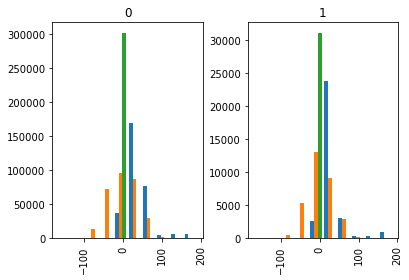

In [9]:
df_features_y.hist(column=['distanceNet', 'angleNet'], by='isGoal')